In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()
llm = ChatOpenAI()

In [3]:
class JokeState(TypedDict):
    
    topic:str
    joke:str
    explanation:str
    

In [4]:
def generate_joke(state:JokeState):
    
    prompt = f"generate a joke on the topic - {state['topic']}"
    response = llm.invoke(prompt).content
    
    return {'joke':response}

In [5]:
def generate_explanation(state:JokeState):
     
    prompt = f"write an explanation for the joke - {state['joke']}"
    response = llm.invoke(prompt).content
    
    return {'explanation':response}

In [6]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node("generate_explanation",generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge("generate_joke","generate_explanation")
graph.add_edge("generate_explanation",END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

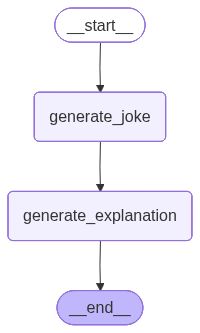

In [7]:
workflow

In [8]:
config1 = {'configurable':{'thread_id':'1'}}
workflow.invoke({'topic':'pizza'},config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little crusty!',
 'explanation': 'This joke plays on the double meaning of the word "crusty." In one sense, "crusty" can refer to the texture of something, like the crust of a pizza. In another sense, "crusty" can also mean irritable or in a bad mood. The joke sets up the expectation that the pizza is going to the doctor because it is unwell, but then plays on the idea that the pizza is actually going to the doctor because it\'s feeling irritable or "crusty." It\'s a simple play on words that adds humor to the situation.'}

In [9]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little crusty!', 'explanation': 'This joke plays on the double meaning of the word "crusty." In one sense, "crusty" can refer to the texture of something, like the crust of a pizza. In another sense, "crusty" can also mean irritable or in a bad mood. The joke sets up the expectation that the pizza is going to the doctor because it is unwell, but then plays on the idea that the pizza is actually going to the doctor because it\'s feeling irritable or "crusty." It\'s a simple play on words that adds humor to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-a5a8-687c-8002-18d8435b52f0'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-29T11:37:12.348274+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-9671-6c3b-8001-b193eeaf0744'

In [10]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little crusty!', 'explanation': 'This joke plays on the double meaning of the word "crusty." In one sense, "crusty" can refer to the texture of something, like the crust of a pizza. In another sense, "crusty" can also mean irritable or in a bad mood. The joke sets up the expectation that the pizza is going to the doctor because it is unwell, but then plays on the idea that the pizza is actually going to the doctor because it\'s feeling irritable or "crusty." It\'s a simple play on words that adds humor to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-a5a8-687c-8002-18d8435b52f0'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-29T11:37:12.348274+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-9671-6c3b-8001-b193eeaf0744

In [11]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why was the spaghetti always tired? Because it had too many "pasta" deadlines!',
 'explanation': 'This joke is a play on words between the word "pasta" and the word "past." In this joke, the spaghetti is always tired because it has too many "pasta" deadlines. The word "pasta" is used in place of "past" to create a pun, implying that the spaghetti is overwhelmed with deadlines because it is made of pasta. This joke is meant to be light-hearted and humorous by creating a silly and unexpected reason for why the spaghetti is always tired.'}

In [12]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why was the spaghetti always tired? Because it had too many "pasta" deadlines!', 'explanation': 'This joke is a play on words between the word "pasta" and the word "past." In this joke, the spaghetti is always tired because it has too many "pasta" deadlines. The word "pasta" is used in place of "past" to create a pun, implying that the spaghetti is overwhelmed with deadlines because it is made of pasta. This joke is meant to be light-hearted and humorous by creating a silly and unexpected reason for why the spaghetti is always tired.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-c288-6d0e-8002-9cd72f0fba01'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-29T11:37:15.376155+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-b38b-6b13-8001-ead8f2c69a74'}}, tasks=(), interrupts=())

In [13]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little crusty!', 'explanation': 'This joke plays on the double meaning of the word "crusty." In one sense, "crusty" can refer to the texture of something, like the crust of a pizza. In another sense, "crusty" can also mean irritable or in a bad mood. The joke sets up the expectation that the pizza is going to the doctor because it is unwell, but then plays on the idea that the pizza is actually going to the doctor because it\'s feeling irritable or "crusty." It\'s a simple play on words that adds humor to the situation.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-a5a8-687c-8002-18d8435b52f0'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-29T11:37:12.348274+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-9671-6c3b-8001-b193eeaf0744

In [14]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why was the spaghetti always tired? Because it had too many "pasta" deadlines!', 'explanation': 'This joke is a play on words between the word "pasta" and the word "past." In this joke, the spaghetti is always tired because it has too many "pasta" deadlines. The word "pasta" is used in place of "past" to create a pun, implying that the spaghetti is overwhelmed with deadlines because it is made of pasta. This joke is meant to be light-hearted and humorous by creating a silly and unexpected reason for why the spaghetti is always tired.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-c288-6d0e-8002-9cd72f0fba01'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-29T11:37:15.376155+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06d-b38b-6b13-8001-ead8f2c69a74'}}, tasks=(), interrupts=()),
 StateSnapshot(va

### Time Travel

In [15]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": '1f0fcfea-b6e8-698e-8000-bc3a200a843d'}})


StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0fcfea-b6e8-698e-8000-bc3a200a843d'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [16]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0fcfea-b6e8-698e-8000-bc3a200a843d"}})


EmptyInputError: Received no input for __start__

### Update State

In [17]:
workflow.update_state({'configurable':{'thread_id':'1','checkpoint_id':'1f0fcfea-b6e8-698e-8000-bc3a200a843d','checkpoint_ns':""}},{'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0fd06e-3f6e-6b5c-8000-6907d2d0c995'}}

In [18]:
list(workflow.get_state_history(config1))


[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06e-3f6e-6b5c-8000-6907d2d0c995'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2026-01-29T11:37:28.472662+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fcfea-b6e8-698e-8000-bc3a200a843d'}}, tasks=(PregelTask(id='061ee1a7-5a9d-f061-4000-f1d5e72f11b2', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little crusty!', 'explanation': 'This joke plays on the double meaning of the word "crusty." In one sense, "crusty" can refer to the texture of something, like the crust of a pizza. In another sense, "crusty" can also mean irritable or in a bad mood. The joke sets up 

In [19]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0fd001-30af-650b-8001-c3d38733b511"}})


EmptyInputError: Received no input for __start__

In [20]:
list(workflow.get_state_history(config1))


[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd06e-3f6e-6b5c-8000-6907d2d0c995'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2026-01-29T11:37:28.472662+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fcfea-b6e8-698e-8000-bc3a200a843d'}}, tasks=(PregelTask(id='061ee1a7-5a9d-f061-4000-f1d5e72f11b2', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor?\nBecause it was feeling a little crusty!', 'explanation': 'This joke plays on the double meaning of the word "crusty." In one sense, "crusty" can refer to the texture of something, like the crust of a pizza. In another sense, "crusty" can also mean irritable or in a bad mood. The joke sets up 

### Fault Tolerance

In [2]:
from langgraph.graph import StateGraph,END,START
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [3]:
# 1. Define the State
class CrashState(TypedDict):
    input : str
    step1 : str
    step2 : str
    step3 : str

In [4]:
# 2. Define Steps

def step_1(state:CrashState):
    print("✅ Step1 executed")
    return {'step1': "done","input":state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(50)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [5]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

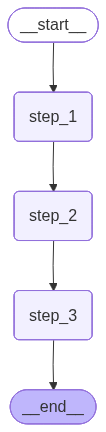

In [6]:
graph

In [8]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed


In [9]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [10]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd072-0f14-63e1-8003-7737006eabb8'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-29T11:39:10.776624+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd072-0f11-6c7c-8002-c82575cb947a'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd072-0f11-6c7c-8002-c82575cb947a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-29T11:39:10.775615+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0fd070-3239-6154-8001-dcceb6717784'}}, tasks=(PregelTask(id='8ceb20a9-ee56-2ebf-896d-6a1b77a052b